# ECS766P Data Mining - Assignment 1

- **Professors:** Dr. Emmanouil Benetos, Dr. Dimitrios Kollias
- **Due Date:** Friday, 7. November 2025 (16:00 GMT+1)
- **Student:** Philipp Schmidt
- **Python Version:** 3.9.6 (due to Cubes support)


In [1]:
# Download the required dependencies
%pip install -q -r requirements.txt


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


---

## Task 1


#### a) Load the dataset


Load the Wine dataset from scikit-learn into a pandas DataFrame for exploration.


In [2]:
from sklearn.datasets import load_wine
import pandas as pd

# Load data
data = load_wine()
# Create DataFrame and add target column
df_task1 = pd.DataFrame(data.data, columns=data.feature_names)
df_task1['target'] = pd.Series(data.target)


Display the first few rows of the DataFrame to check the structure and feature names.


In [3]:
print('\nShowing first 5 rows of the dataset:')
display(df_task1)



Showing first 5 rows of the dataset:


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

The feature columns are numeric.
The `target` column encodes three wine classes (`0`, `1`, `2`) and is therefore categorical.
Refer to the scikit-learn documentation for details: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html.
Below the frequency of each class in the dataset is shown.


In [4]:
print('\nFrequency per class in target:')

freq = df_task1['target'].value_counts(normalize=True).sort_index()
display(freq)



Frequency per class in target:


target
0    0.331461
1    0.398876
2    0.269663
Name: proportion, dtype: float64

Therefore the class `0` appears $33\%$, `1` $39\%$ and `2` $27\%$.


#### b) Univariate and multivariate summaries


For univariate summaries the `describe()` function is used to obtain statistics like mean, standard deviation and percentiles for each numeric feature.


In [5]:
print('\nShowing summary statistics for numeric features:')
df_task1.drop(columns='target').describe()



Showing summary statistics for numeric features:


alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

However, since the request in the task sheet is for two specific features, we will provide the variance and skewness, as they are not included in the describe function.


In [6]:
univar_var = df_task1.drop(columns='target').var(numeric_only=True)
univar_skew = df_task1.drop(columns='target').skew(numeric_only=True)

print(f'Variance:\n{univar_var}')
print('\n')
print(f'Skewness:\n{univar_skew}')


Variance:
alcohol                             0.659062
malic_acid                          1.248015
ash                                 0.075265
alcalinity_of_ash                  11.152686
magnesium                         203.989335
total_phenols                       0.391690
flavanoids                          0.997719
nonflavanoid_phenols                0.015489
proanthocyanins                     0.327595
color_intensity                     5.374449
hue                                 0.052245
od280/od315_of_diluted_wines        0.504086
proline                         99166.717355
dtype: float64


Skewness:
alcohol                        -0.051482
malic_acid                      1.039651
ash                            -0.176699
alcalinity_of_ash               0.213047
magnesium                       1.098191
total_phenols                   0.086639
flavanoids                      0.025344
nonflavanoid_phenols            0.450151
proanthocyanins                 0.517137
color_int

For multivariate exploration we compute a correlation matrix and visualize feature relationships with a scatterplot matrix (pairplot) using `seaborn`.


In [7]:
# Correlation Matrix
print('\nComputing correlation matrix:')
display(df_task1.drop(columns='target').corr(numeric_only=True))



Computing correlation matrix:


alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315_of_diluted_wines         0.519067        -0.428815  0.565468   
proline                              0.330417         0.316100  0.236183   

                              od280/od315_of_diluted_wines   prol


Rendering scatterplot matrix:


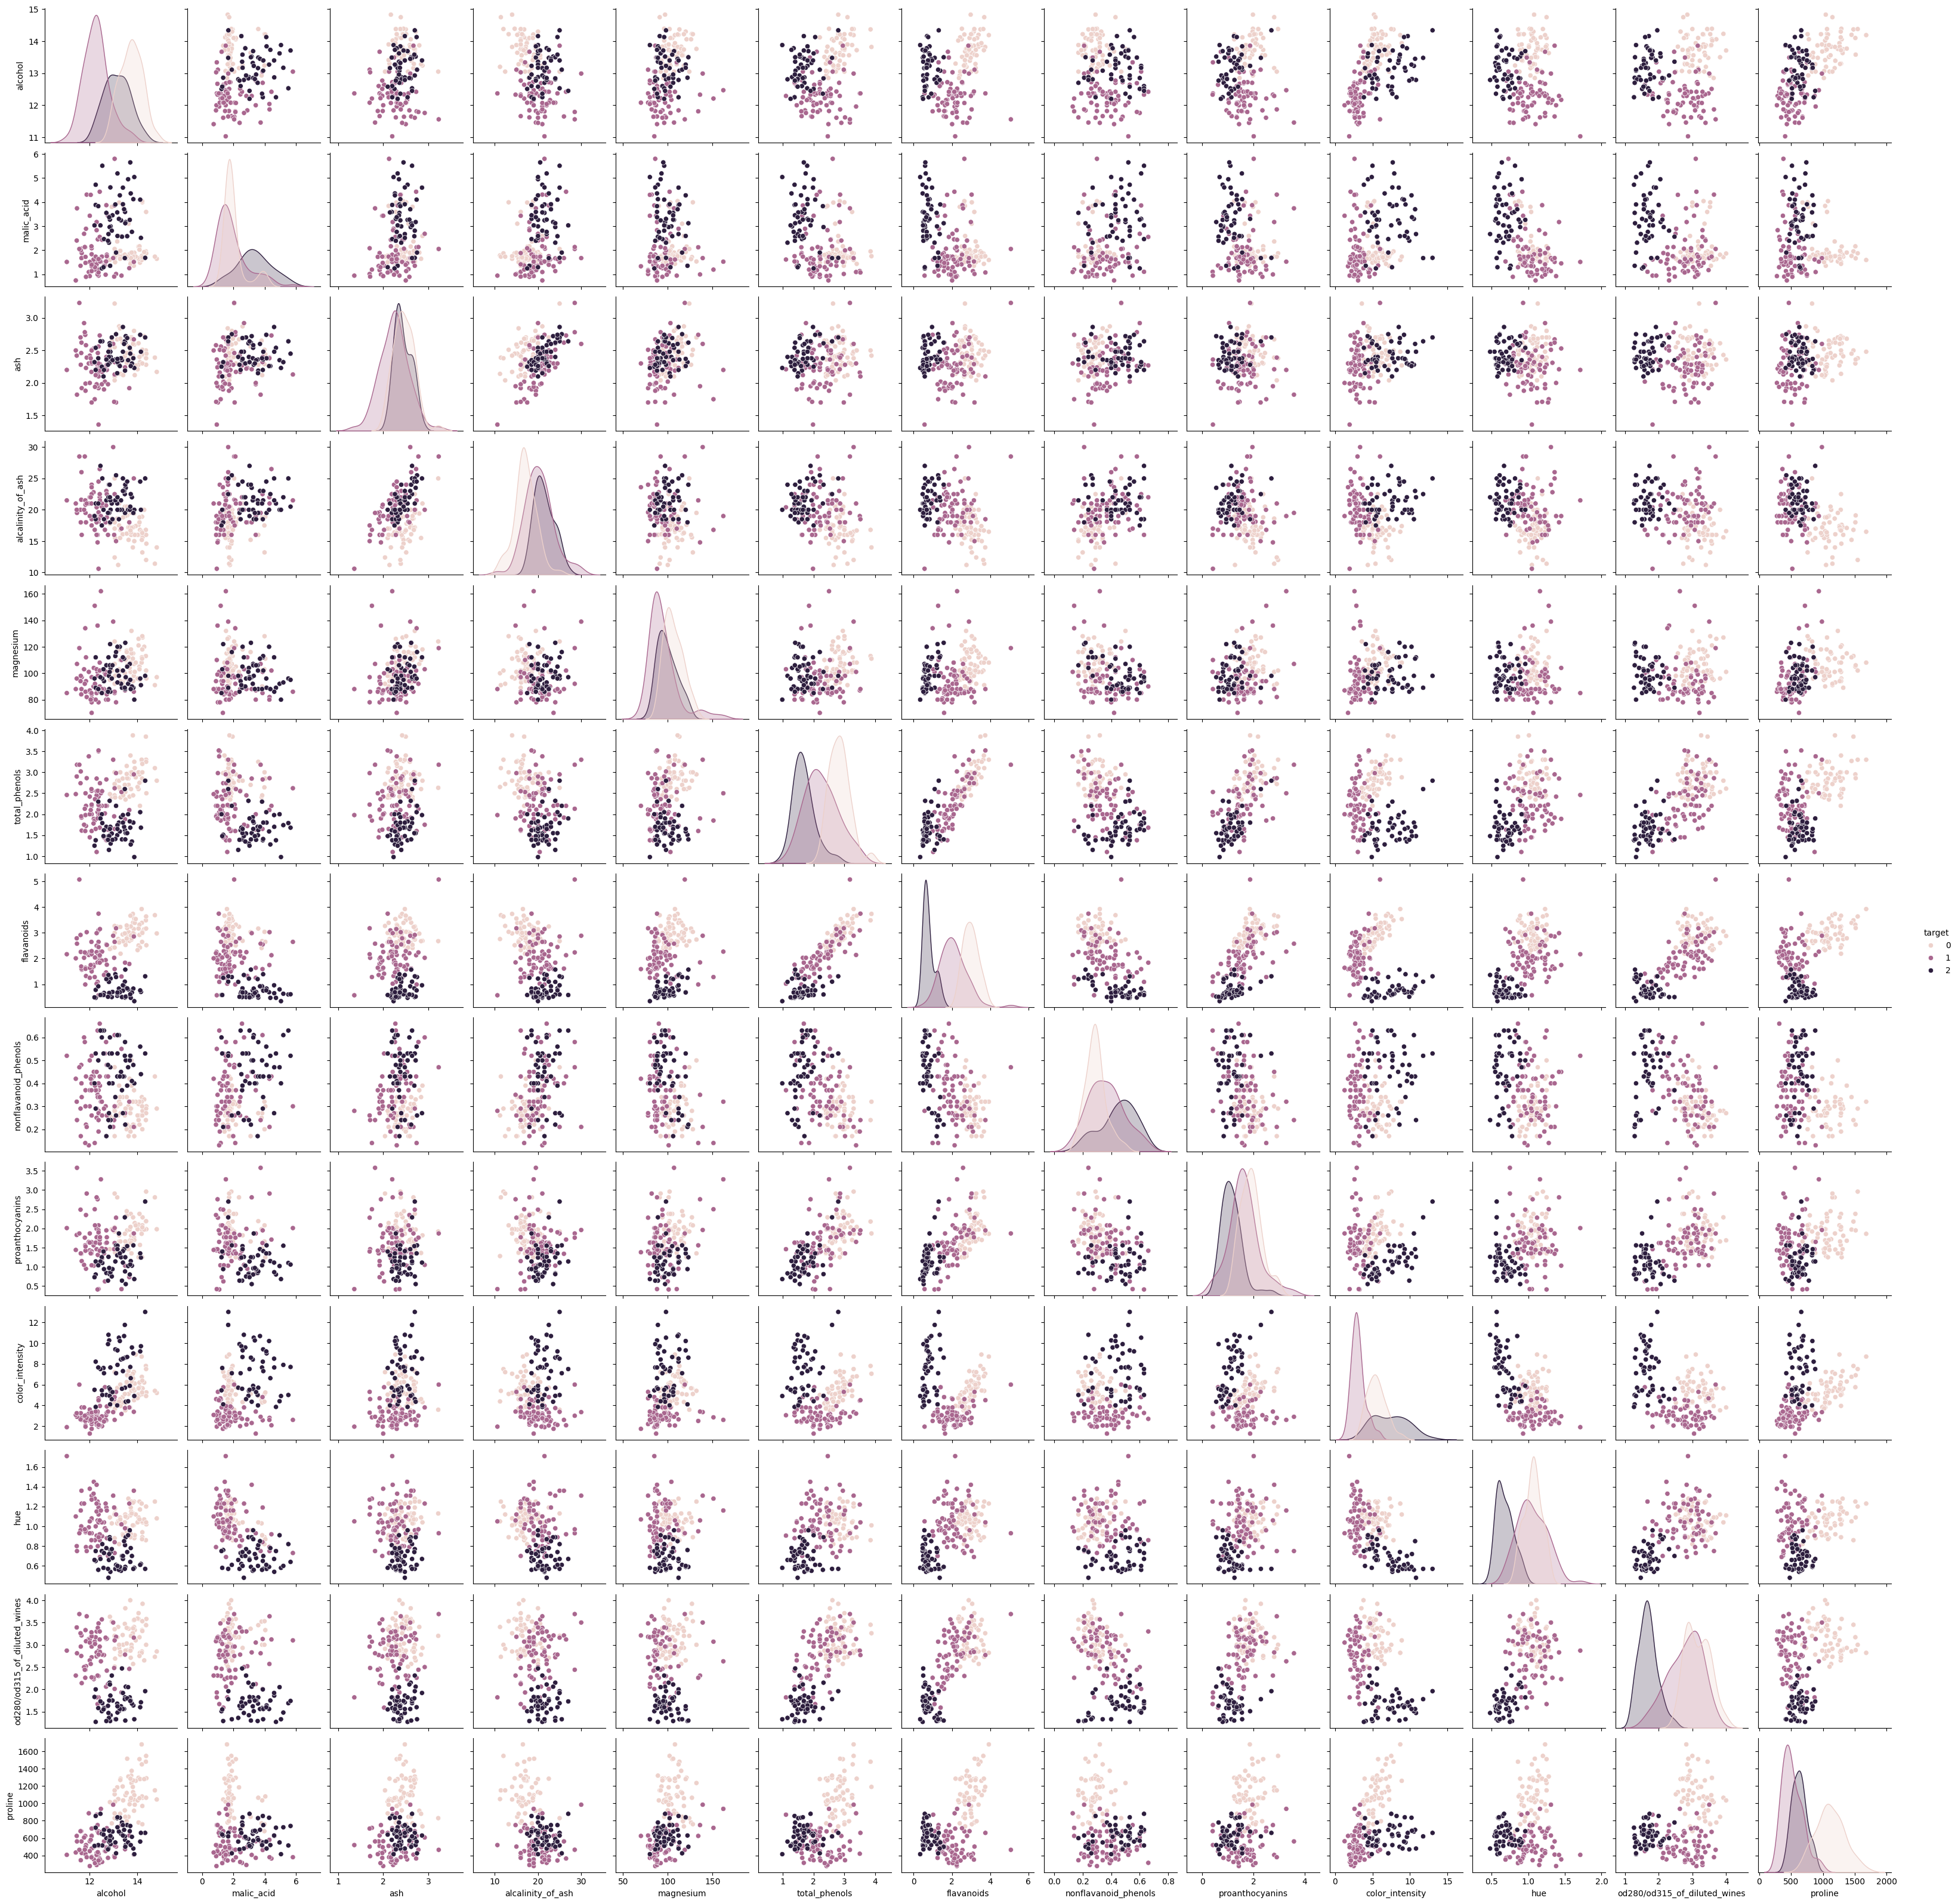

In [8]:
# Pairplot
from matplotlib import pyplot as plt
import seaborn as sns

print('\nRendering scatterplot matrix:')
# Classes will be distinguished by color (not needed for assignment)
sns.pairplot(df_task1, hue='target')
plt.show()


#### c) Group by categorical attribute


By using the `groupby()` function we can group the dataframe by the `target` attribute and afterwards calculate the median.


In [9]:
print('\nGroup and calculate the median:')
display(df_task1.groupby('target').median())



Group and calculate the median:


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
target                                                            
0        13.750       1.770  2.44               16.8      104.0   
1        12.290       1.610  2.24               20.0       88.0   
2        13.165       3.265  2.38               21.0       97.0   

        total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
target                                                                     
0               2.800       2.980                  0.29            1.870   
1               2.200       2.030                  0.37            1.610   
2               1.635       0.685                  0.47            1.105   

        color_intensity    hue  od280/od315_of_diluted_wines  proline  
target                                                                 
0                  5.40  1.070                          3.17   1095.0  
1                  2.90  1.040                          2.83    495.0  
2                  7.55  0.665                          1.66    627.5

#### d) Create scatter plot


First, we have to get which attributes have the highest correlation.
Therefore, we create a correlation matrix, bring it into a form to sort it by using the `unstack()` method, and later drop all duplicates for better readability and as only one of the highest correlation is asked for and not multiple.
We can drop these duplicates as in the correlation matrix in _1b)_ we have already seen that for none of the different attributes exists a correlation of 1.


In [10]:
print('\nHighest correlation between attributes:')
# Store the absolute values
correlation_values = df_task1.corr(numeric_only=True).abs()
correlation_values = correlation_values.unstack().sort_values(ascending=False).drop_duplicates()
display(correlation_values)



Highest correlation between attributes:


alcohol                       alcohol                         1.000000
total_phenols                 flavanoids                      0.864564
target                        flavanoids                      0.847498
od280/od315_of_diluted_wines  target                          0.788230
                              flavanoids                      0.787194
                                                                ...   
target                        ash                             0.049643
color_intensity               proanthocyanins                 0.025250
alcalinity_of_ash             color_intensity                 0.018732
proanthocyanins               ash                             0.009652
ash                           od280/od315_of_diluted_wines    0.003911
Length: 92, dtype: float64

Here we can see that the highest correlation exists for the attribute pair of `total_phenols` and `flavanoids`.
Their scatterplot will be shown below, with the different classes highlighted.


In [11]:
print('\nScatterplot for highest correlating attributes:')
sns.scatterplot(x='total_phenols', y='flavanoids', hue='target', data=df_task1)
plt.show()



Scatterplot for highest correlating attributes:


---

## Task 2


First, the set needs to get sorted in ascending order before applying the binning algorithm.


The set $\{5,20,1,6,13,8,9,11,17,7,2,12\}$ will therefore be transformed to $\{1,2,5,6,7,8,9,11,12,13,17,20\}$.


Now this set will be divided into three distinct bins of equal size by applying the equal-frequency-binning and smoothing by bin boundaries method.
The results can be seen below.


$$S_{equal-frequency} = \{\{1,2,5,6\},\{7,8,9,11\},\{12,13,17,20\}\}$$

$$S_{smoothing\,by\,bin\,boundaries} = \{\{1,1,6,6\},\{7,7,7,11\},\{12,12,20,20\}\}$$


> Note: In $S_{smoothing\,by\,bin\,boundaries}$ the second subset can either be $\{7,7,7,11\}$ or $\{7,7,11,11\}$ as the value $9$ has a similar distance to both boundaries.


---

## Task 3


First, load the dataset, store it in a dataframe, and display it to get a better understanding of its structure.


In [12]:
df_task3 = pd.read_csv('data/country-income.csv')
display(df_task3)


Region   Age   Income Online Shopper
0   India  49.0  86400.0             No
1  Brazil  32.0  57600.0            Yes
2     USA  35.0  64800.0             No
3  Brazil  43.0  73200.0             No
4     USA  45.0      NaN            Yes
5   India  40.0  69600.0            Yes
6  Brazil   NaN  62400.0             No
7   India  53.0  94800.0            Yes
8     USA  55.0  99600.0             No
9   India  42.0  80400.0            Yes

As proposed in the assignment itself, we will make use of the `sklearn.impute` library to replace the faulty values in the _Age_ and _Income_ columns.


In [13]:
from sklearn.impute import SimpleImputer

df_task3_imputed = df_task3.copy()

# Create imputer instance utilizing the mean
num_imputer = SimpleImputer(strategy='mean')

# Define the columns with numerical values
numerical_cols = ['Age','Income']

# Impute the numerical values
df_task3_imputed[numerical_cols] = num_imputer.fit_transform(df_task3[numerical_cols])


Afterwards, we transform all categorical data to numerical values using the `sklearn.preprocessing` package and apply one-hot encoding.


In [14]:
from sklearn.preprocessing import OneHotEncoder

# Create encoder instance
one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Define the columns with categorical values
categorical_cols = ['Region','Online Shopper']

# Get an array out of the categorical columns as it does not return a data frame
one_hot_array = one_hot.fit_transform(df_task3_imputed[categorical_cols])

# Create new column names for the one hot transformed data
one_hot_cols = one_hot.get_feature_names_out(categorical_cols)

# Create a data frame out of the one hot array and its respective new column names
one_hot_df = pd.DataFrame(one_hot_array, columns=one_hot_cols, index=df_task3_imputed.index)

# Merge the data frames
df_task3_imputed = pd.concat([df_task3_imputed.drop(columns=categorical_cols), one_hot_df], axis=1)


Finally, we can print the cleaned dataset.


In [15]:
print('\nCleaned dataset:')
display(df_task3_imputed)



Cleaned dataset:


Age        Income  Region_Brazil  Region_India  Region_USA  \
0  49.000000  86400.000000            0.0           1.0         0.0   
1  32.000000  57600.000000            1.0           0.0         0.0   
2  35.000000  64800.000000            0.0           0.0         1.0   
3  43.000000  73200.000000            1.0           0.0         0.0   
4  45.000000  76533.333333            0.0           0.0         1.0   
5  40.000000  69600.000000            0.0           1.0         0.0   
6  43.777778  62400.000000            1.0           0.0         0.0   
7  53.000000  94800.000000            0.0           1.0         0.0   
8  55.000000  99600.000000            0.0           0.0         1.0   
9  42.000000  80400.000000            0.0           1.0         0.0   

   Online Shopper_No  Online Shopper_Yes  
0                1.0                 0.0  
1                0.0                 1.0  
2                1.0                 0.0  
3                1.0                 0.0  
4                0.0                 1.0  
5                0.0                 1.0  
6                1.0                 0.0  
7                0.0                 1.0  
8                1.0                 0.0  
9                0.0                 1.0

---

## Task 4


First, load the dataset, store it in a dataframe, and display it to get a better understanding of its structure.


In [16]:
df_task4 = pd.read_csv('data/shoesize.csv')
display(df_task4)


Index Gender  Size  Height
0        1      F   5.5    60.0
1        2      F   6.0    60.0
2        3      F   7.0    60.0
3        4      F   8.0    60.0
4        5      F   8.0    60.0
..     ...    ...   ...     ...
403    404      M  13.0    78.0
404    405      M  13.0    78.0
405    406      M  14.0    78.0
406    407      M  15.0    80.0
407    408      M  15.0    81.0

[408 rows x 4 columns]

Now create two distinct datasets, based on whether the gender is male or female.


In [17]:
from scipy.stats import pearsonr



Relation between shoe size and height for men.
Pearson correlation coefficient: 0.7677093547300967


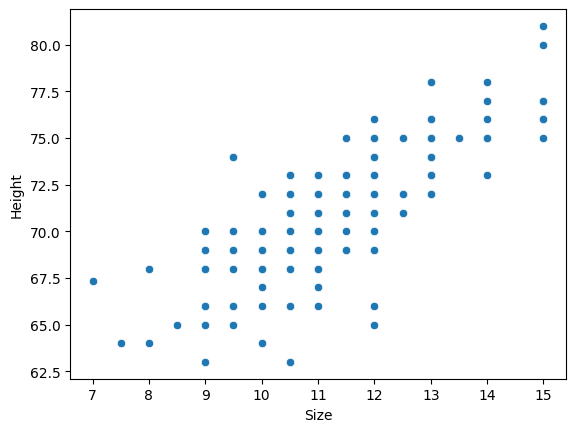

In [18]:
# Male

# Create subset
df_task4_male = df_task4[df_task4['Gender'] == 'M']
# Calculate Pearson correlation coefficient
pcc_male, _ = pearsonr(df_task4_male['Size'],df_task4_male['Height'])
# Create scatterplot
sns.scatterplot(x='Size', y='Height', data=df_task4_male)

# Output results
print(f'\nRelation between shoe size and height for men.\nPearson correlation coefficient: {pcc_male}')
plt.show()



Relation between shoe size and height for women.
Pearson correlation coefficient: 0.7078119417143968


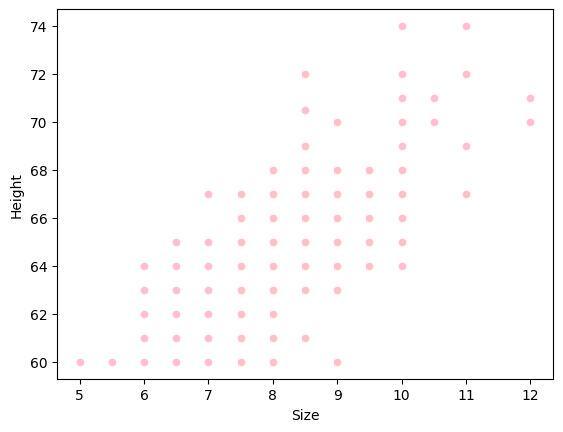

In [19]:
# female

# Create subset
df_task4_female = df_task4[df_task4['Gender'] == 'F']
# Calculate Pearson correlation coefficient
pcc_female, _ = pearsonr(df_task4_female['Size'],df_task4_female['Height'])
# Create scatterplot
sns.scatterplot(x='Size', y='Height', data=df_task4_female, color='pink')

# Output results
print(f'\nRelation between shoe size and height for women.\nPearson correlation coefficient: {pcc_female}')
plt.show()


As the Pearson correlation coefficient is $\approx 0.77$ for men and $\approx 0.71$ for women, respectively, it can be said that shoe size and a person's height are highly correlated.
However, this correlation doesn’t imply that taller individuals necessarily have larger shoe sizes, and vice versa.


---

## Task 5


Copy the preprocessed dataset from task 1 and save it as a new dataframe for this task.


In [20]:
df_task5 = df_task1.copy()


Remove the target column since it should not be included in the PCA and store it separately.


In [21]:
target_column = df_task5['target']
df_task5 = df_task5.drop(columns='target')



Scale the data because PCA relies on deviations that otherwise wouldn’t be truly comparable.


In [22]:
from sklearn.discriminant_analysis import StandardScaler

df_task5_scaled = StandardScaler().fit_transform(df_task5)


Conduct Principal Component Analysis on two columns, visualize the results, and highlight the distinct target classes.


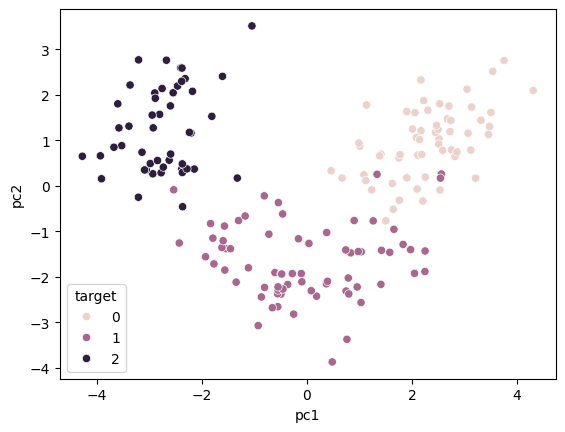

In [23]:
from sklearn.decomposition import PCA

# Perform PCA
components_amount = 2
pca = PCA(n_components=components_amount)
principal_components_array = pca.fit_transform(df_task5_scaled)

# Create dataframe
principal_df = pd.DataFrame(data=principal_components_array, columns=['pc1', 'pc2'])

# Add the class attribute again
principal_df['target'] = target_column.values

# Plot
sns.scatterplot(
    data=principal_df, 
    x='pc1', y='pc2', 
    hue='target'
)
plt.show()


As evident, the different classes are quite distinct and can be easily differentiated based on the clusters they form.
There seems to be a slight overlap between the various clusters, which can likely be attributed to noise or outliers.
This allows us to determine the class of a wine based on its composition.

Considering the nature of the task, I assume that most students would not perform the scaling beforehand, which would significantly skew the results, as mentioned earlier, PCA relies on different deviations.
For completeness, I’ve attached a scatterplot illustrating how this would appear.


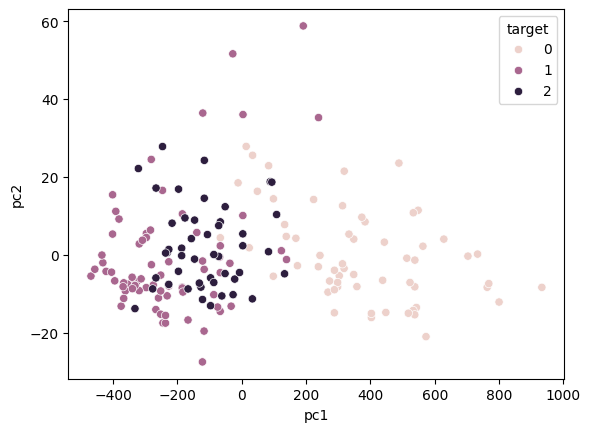

In [24]:
# Using the dataframe before scaling
principal_components_array = pca.fit_transform(df_task5)

# Create dataframe
principal_df = pd.DataFrame(data=principal_components_array, columns=['pc1', 'pc2'])

# Add the class attribute again
principal_df['target'] = target_column.values

# Plot
sns.scatterplot(
    data=principal_df, 
    x='pc1', y='pc2', 
    hue='target'
)
plt.show()


---

## Task 6


The heatmap is a distance matrix where lighter cells indicate greater similarity and darker cells indicate greater dissimilarity.

Because the rows and columns are ordered by parental education, students in the same category appear next to each other and form pale blocks along the main diagonal, which is lightest where each item is compared with itself and the distance is zero.

The block for pairs within the _"some high school"_ with _"some high school"_ group in the lower right corner and the _"master's degree"_ with _"master's degree"_ in the upper left corner are relatively pale, showing small average pairwise distances within that group.

In contrast, the off-diagonal blocks that compare _“some high school”_ with _“master’s degree”_ in the upper right and lower left are noticeably darker, showing larger pairwise distances across those two groups.
They are highlighted by a red rectangle in the attached image.

From this contrast in shading, we can infer that the average distance between students whose parents have different education levels is larger than those with the same level.


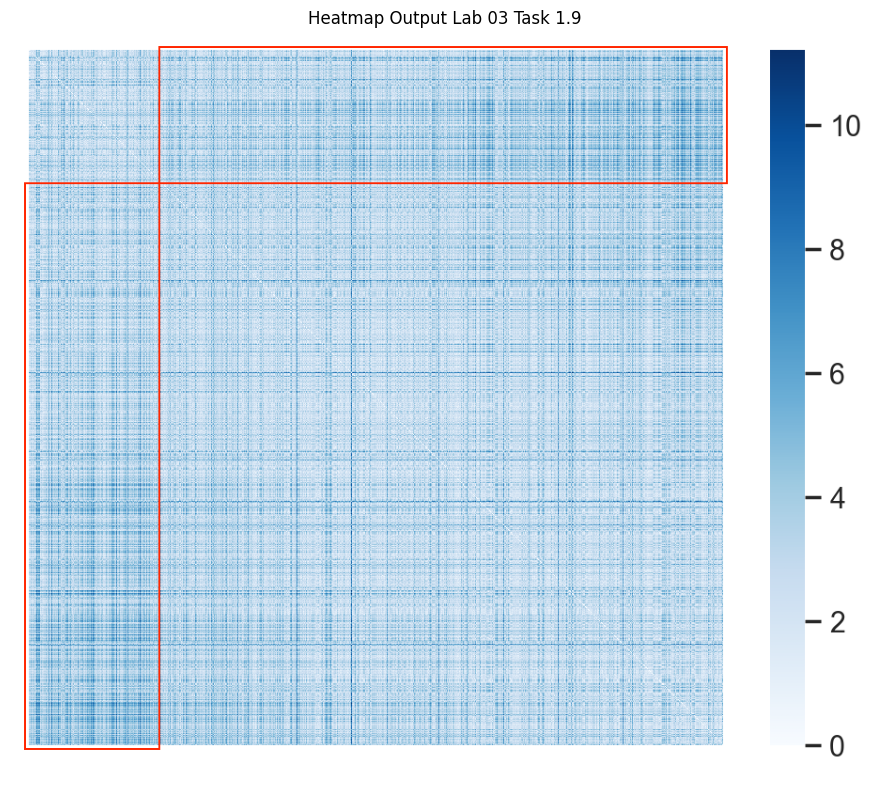

In [25]:
# Have to display the image that way as embedding in markdown will not be displayed in the output PDF

from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display the heatmap image
img = mpimg.imread('img/task6_heatmap.png')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Heatmap Output Lab 03 Task 1.9')
plt.tight_layout()
plt.show()


---

## Task 7


#### a) Create Cube and Data Model

Import the CSV file into Cubes, create a workspace, a data cube, and then print the created JSON.


In [26]:
from sqlalchemy import create_engine
from cubes.tutorial.sql import create_table_from_csv
from cubes import Workspace
import json
from pathlib import Path

engine = create_engine('sqlite:///data.sqlite')
    
create_table_from_csv(engine,
                      'data/country-income.csv',
                      table_name='country_income',
                      fields=[
                          ('region', 'string'),
                          ('age', 'integer'),
                          ('income', 'integer'),
                          ('online_shopper', 'boolean')],
                      create_id=True)

workspace = Workspace()
workspace.register_default_store('sql', url='sqlite:///data.sqlite')

workspace.import_model('data/cubes_data_model_task7.json')

cube = workspace.cube("country_income")

# Display the JSON content
model_path = Path('data/cubes_data_model_task7.json')
with model_path.open('r', encoding='utf-8') as f:
    parsed_json = json.load(f)

print(f'Data model:\n\n{json.dumps(parsed_json, indent=4)}')



Data model:

{
    "dimensions": [
        {
            "name": "region",
            "label": "Region",
            "levels": [
                {
                    "name": "region",
                    "label": "Region",
                    "attributes": [
                        "region"
                    ]
                }
            ]
        },
        {
            "name": "age",
            "label": "Age",
            "levels": [
                {
                    "name": "age",
                    "label": "Age",
                    "attributes": [
                        "age"
                    ]
                }
            ]
        },
        {
            "name": "online_shopper",
            "label": "Online Shopper",
            "levels": [
                {
                    "name": "online_shopper",
                    "label": "Online Shopper",
                    "attributes": [
                        "online_shopper"
                    ]
           

#### b) Produce Aggregated Results


Create the browser to perform queries on.


In [27]:
browser = workspace.browser(cube)


**i)** Produce aggregate results for the whole data cube:


In [28]:
result_whole = browser.aggregate()
print('Whole cube aggregates: ')
display(result_whole.summary)


Whole cube aggregates: 


{'income_total': 688800.0,
 'income_avg': 68880.0,
 'income_min': 57600,
 'income_max': '',
 'record_count': 10}

**ii)** Produce aggregate results for results per region:


In [29]:
result_by_region = browser.aggregate(drilldown=['region'])

print('Aggregates by region:')

for record in result_by_region:
    display(record)


Aggregates by region:


{'region': 'Brazil',
 'income_total': 193200,
 'income_avg': 64400.0,
 'income_min': 57600,
 'income_max': 73200,
 'record_count': 3}

{'region': 'India',
 'income_total': 331200,
 'income_avg': 82800.0,
 'income_min': 69600,
 'income_max': 94800,
 'record_count': 4}

{'region': 'USA',
 'income_total': 164400.0,
 'income_avg': 54800.0,
 'income_min': 64800,
 'income_max': '',
 'record_count': 3}

**iii)** Produce aggregate results for results per online shopping activity:


In [30]:
result_by_online_shopper = browser.aggregate(drilldown=['online_shopper'])

print('Aggregates by online shopper:')

for record in result_by_online_shopper:
    display(record)


Aggregates by online shopper:


{'online_shopper': 'No',
 'income_total': 386400,
 'income_avg': 77280.0,
 'income_min': 62400,
 'income_max': 99600,
 'record_count': 5}

{'online_shopper': 'Yes',
 'income_total': 302400.0,
 'income_avg': 60480.0,
 'income_min': 57600,
 'income_max': '',
 'record_count': 5}

**iv)** Produce aggregate results for results for all people aged between 40 and 50:


In [31]:
from cubes import PointCut

# Create a point cut for age range 40-50
age_cut = PointCut('age', [40, 50])

result_age_40_50 = browser.aggregate(cuts=[age_cut])

print('Aggregates for people aged between 40 and 50:')
display(result_age_40_50.summary)


Aggregates for people aged between 40 and 50:


{'income_total': 688800.0,
 'income_avg': 68880.0,
 'income_min': 57600,
 'income_max': '',
 'record_count': 10}

> Note: For instance, in the last cell, the output for income_max is empty. This is because the task required the use of the unsanitized CSV file. For better results, it’s recommended to use the data created in task 1.


---

## Task 8


For determining which class the point $x_{3}$ belongs to based on the KNN algorithm with $k = 1$, we have to check if the distance of this point to $x_{1}$ or $x_{2}$ is shorter.
Wherever the shorter distance is, we assign $x_{3}$ to their class.

With the points $x_1=(1,2)$, $x_2=(-1,0)$ and $x_3=(3,2)$, while $y_1=1$ and $y_2=0$.

We calculate the **Euclidean** distance for both combinations:

$$
\begin{aligned}
d(x_{1}, x_{3}) &= \sqrt{(1-3)^2 + (2-2)^2} = \sqrt{4}=2,\\
d(x_{2}, x_{3}) &= \sqrt{((-1)-3)^2 + (0-2)^2} = \sqrt{16+4}=\sqrt{20}=2\sqrt{5}.
\end{aligned}
$$

As $d(x_{1}, x_{3}) < d(x_{2}, x_{3})$ we assign $x_{3}$ to $y_{3} = 1$.

We do the same for $x_{4} = (0,1)$:

$$
\begin{aligned}
d(x_{1}, x_{4}) &= \sqrt{(1-0)^2 + (2-1)^2} = \sqrt{1+1}=\sqrt{2},\\
d(x_{2}, x_{4}) &= \sqrt{((-1)-0)^2 + (0-1)^2} = \sqrt{1+1}=\sqrt{2}.
\end{aligned}
$$

As $d(x_{1}, x_{4}) = d(x_{2}, x_{4})$ and $y_1 \neq y_2$ we either cannot decide which group to assign $x_4$ to without a tie-breaking rule, e.g. pick the smaller label.

> Note: In 1-NN, only distances to the training points $(x_1, x_2)$ matter, so computing $d(x_{3}, x_{4})$ is not needed.
